### R SITS Model

In [1]:
#install.packages('tidyverse', lib='~/R/x86_64-pc-linux-gnu-library/4.2')
#install.packages('sits', lib='~/R/x86_64-pc-linux-gnu-library/4.2')
#install.packages('devtools', lib='~/R/x86_64-pc-linux-gnu-library/4.2')


In [2]:
library(tidyverse, lib='~/R/x86_64-pc-linux-gnu-library/4.2')
library(sits, lib='~/R/x86_64-pc-linux-gnu-library/4.2')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
SITS - satellite image time series analysis.

Loaded sits v1.4.1.
        See ?sits for help, citation("sits") for use in publication.
        Documentation avaliable in https://e-sensing.github.io/sitsbook/.



In [9]:
library(httr)
with_config(use_proxy(...), install_github(...))
devtools::install_github("eo2cube/odcr")
library(odcr, lib='~/R/x86_64-pc-linux-gnu-library/4.2')

ERROR: Error in is.request(config): '...' used in an incorrect context


In [3]:
devtools::install_github("e-sensing/sitsdata")

ERROR: Error: Failed to install 'sitsdata' from GitHub:
  Timeout was reached: [api.github.com] Connection timed out after 10001 milliseconds


  |======================================================================| 100%


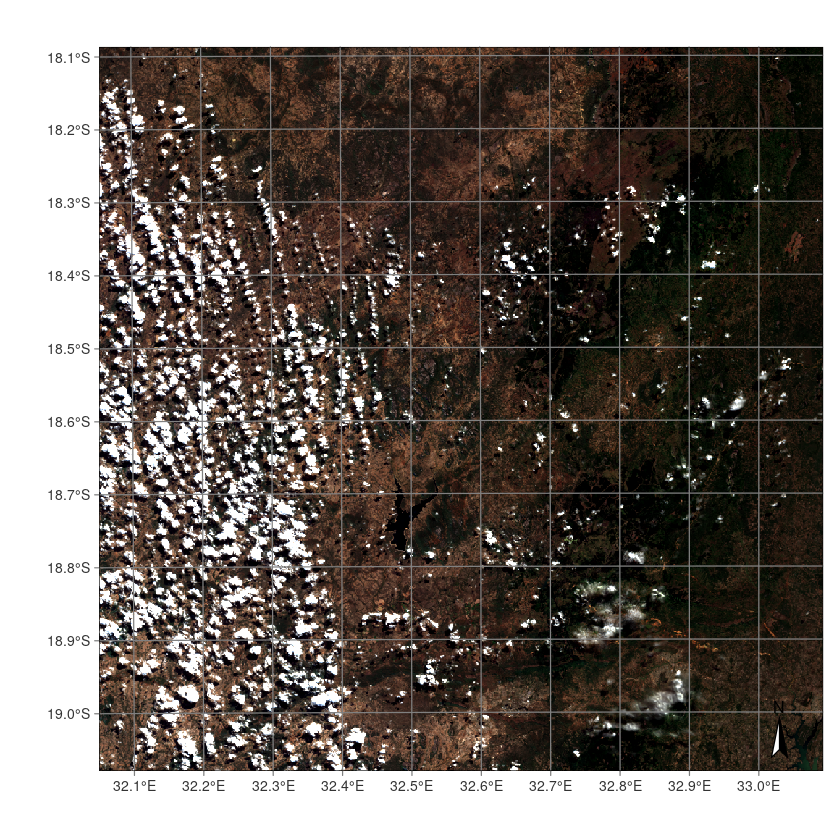

In [37]:
dea_cube <- sits_cube(
  source = "DEAFRICA",
  collection = "S2_L2A",
  roi = c(
    lon_min = 32.87, lat_min = -18.38,
    lon_max = 32.98, lat_max = -18.25
  ),
  bands = c("B01", "B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B09", "B11", "B12"),
  start_date = "2019-06-01",
  end_date = "2019-09-01"
)
plot(dea_cube, red = "B04", blue = "B02", green = "B03")

In [38]:
reg_cube <- sits_regularize(
  cube       = dea_cube,
  output_dir = '~/R',
  res        = 60,
  period     = "P15D",
  multicores = 4
)

Warning message:
“Cloud band not found in provided cube.
                    'sits_regularize()' will just fill nodata values.”


  |======================================================================| 100%


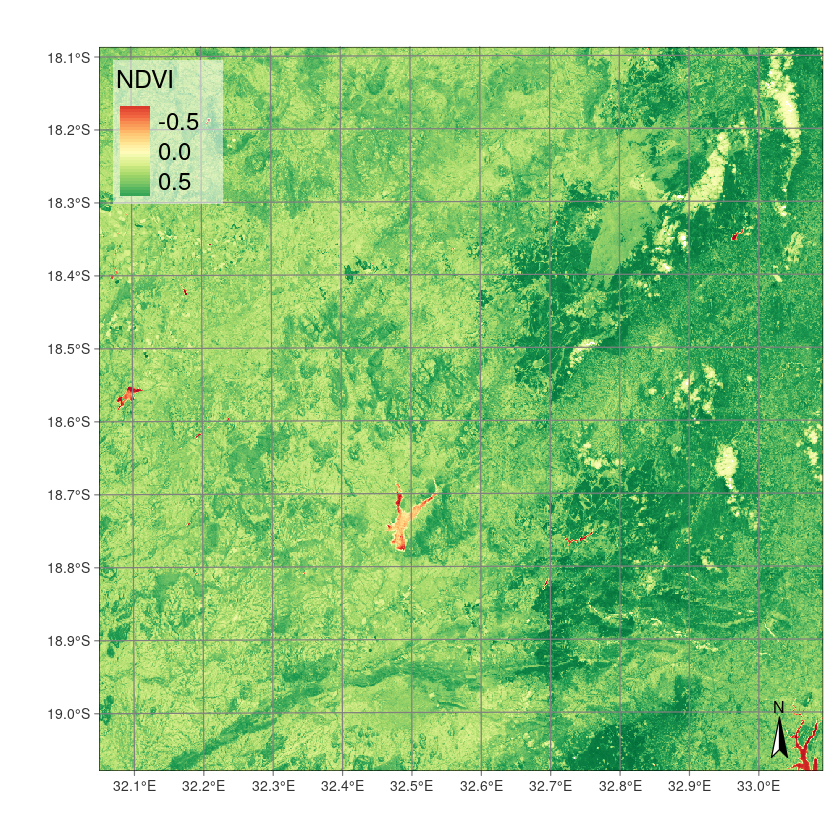

In [39]:
reg_cube <- sits_apply(reg_cube,
  NDVI = (B08 - B04) / (B08 + B04),
  output_dir = '~/R',
  multicores = 4,
  memsize = 12
)
plot(reg_cube, band = "NDVI", color_palette = "RdYlGn")

  |======================================================================| 100%


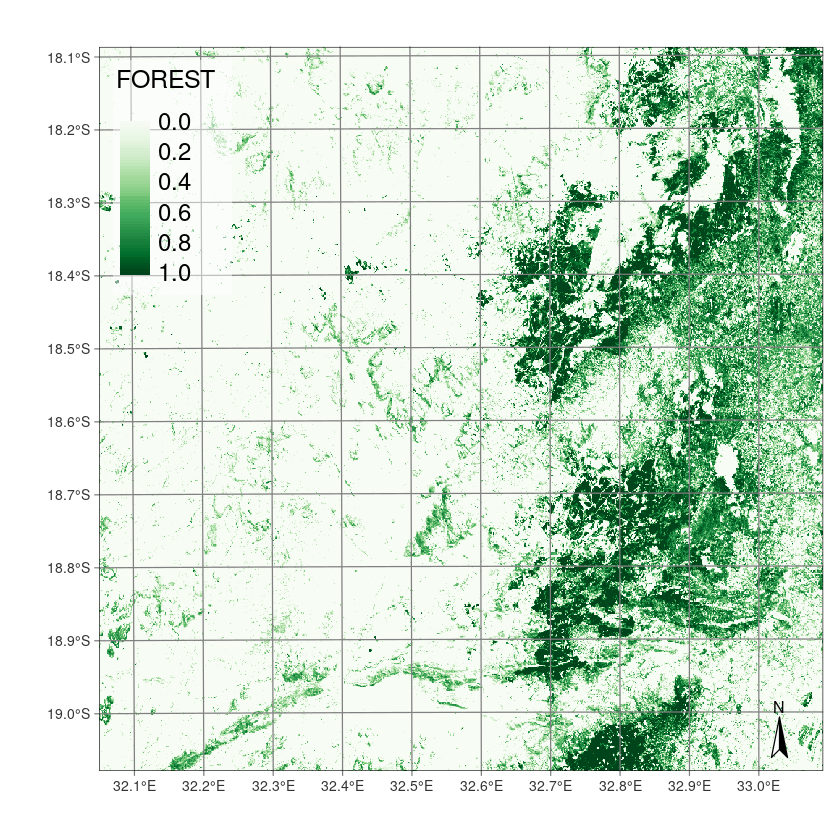

In [43]:
em <- tibble::tribble(
  ~class,   ~B02, ~B03, ~B04, ~B8A, ~B11, ~B12,
  "forest",  200,  352,  189, 2800, 1340,  546,
  "soil",    400,  650,  700, 3600, 3500, 1800,
  "water",   700, 1100, 1400,  850,   40,   26
)
# Generate the mixture model
reg_cube <- sits_mixture_model(
  data = reg_cube,
  endmembers = em,
  multicores = 4,
  memsize = 12,
  output_dir = '~/R'
)
# Plot the FOREST for the first date using the Greens palette
plot(reg_cube, band = "FOREST", color_palette = "Greens")

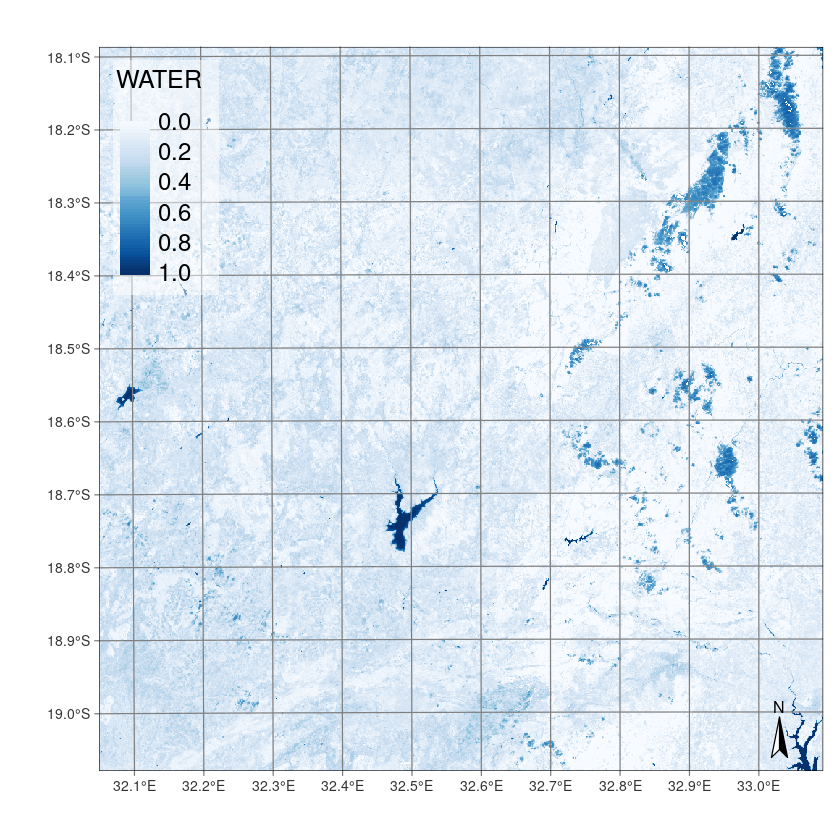

In [44]:
plot(reg_cube, band = "WATER", color_palette = "Blues")

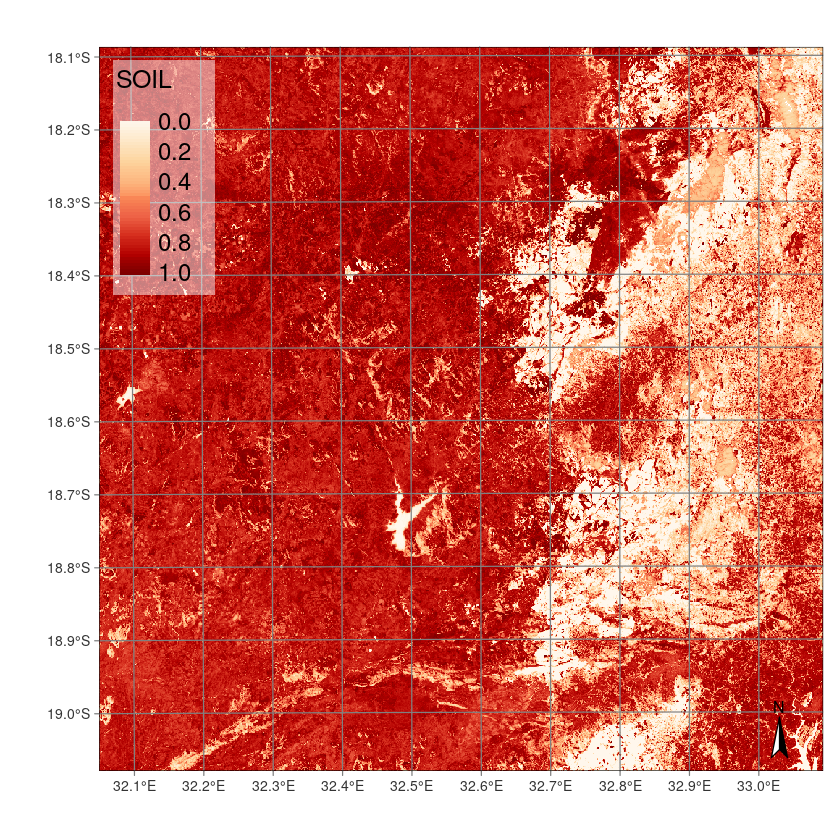

In [45]:
plot(reg_cube, band = "SOIL", color_palette = "OrRd")